In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
reviews = pd.read_csv('wine-reviews.csv', index_col = 0)

In [2]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
years = reviews.title.str.extract('([1-2][0-9]{3})').astype('float64')

years[years < 1990] = None
reviews = reviews.assign(year = years)

In [4]:
good_countries = reviews.loc[reviews.country.isin(['US','Italy','Portugal','Spain','France','Germany','Australia']),:]

Text(0, 0.5, 'Log of Price')

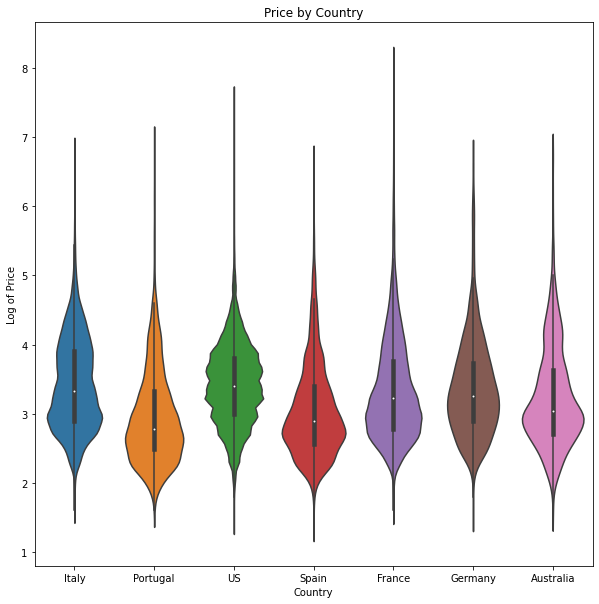

In [5]:
plt.subplots(figsize=(10,10))

sns.violinplot(x = good_countries.country,y = np.log(good_countries.price), 
                          figure_size = [2,2]).set_title('Price by Country')


plt.xlabel("Country")
plt.ylabel("Log of Price")

In [6]:
yearly_price_mean = reviews.groupby('year').price.agg(['mean'])
yearly_price_max = reviews.groupby('year').price.agg(['max'])
yearly_point_mean = reviews.groupby('year').points.agg(['mean'])
yearly_point_max = reviews.groupby('year').points.agg(['max'])

In [7]:
reviews.year.value_counts().sort_index()

1990.0        5
1991.0        4
1992.0       16
1993.0        3
1994.0       23
1995.0       49
1996.0       67
1997.0      303
1998.0      550
1999.0      641
2000.0      758
2001.0      691
2002.0      365
2003.0      597
2004.0     1772
2005.0     3610
2006.0     5772
2007.0     7043
2008.0     7428
2009.0     9865
2010.0    12149
2011.0    12531
2012.0    15728
2013.0    15855
2014.0    15570
2015.0    10042
2016.0     3690
2017.0       11
Name: year, dtype: int64

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Max Rating')]

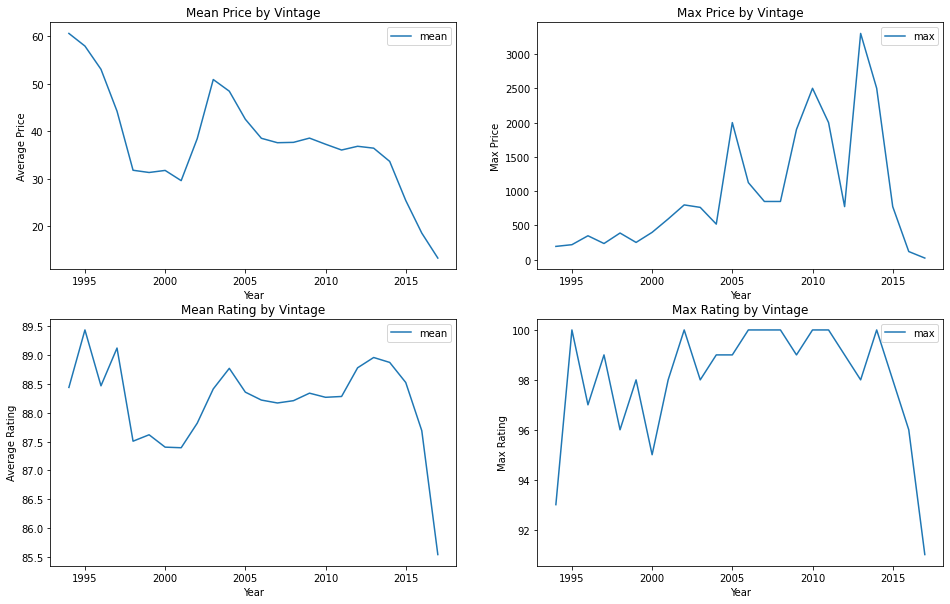

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 10))

(yearly_price_mean[yearly_point_mean.index >= 1994]
 .plot
 .line(title = 'Mean Price by Vintage',ax = axarr[0][0])
 .set(xlabel = 'Year',ylabel = 'Average Price')
)

(yearly_price_max[yearly_point_max.index >= 1994]
.plot
.line(title = 'Max Price by Vintage',ax = axarr[0][1])
.set(xlabel = 'Year',ylabel = 'Max Price'))

(yearly_point_mean[yearly_point_mean.index >= 1994]
.plot
.line(title = 'Mean Rating by Vintage',ax = axarr[1][0])
.set(xlabel = 'Year',ylabel = 'Average Rating'))

(yearly_point_max[yearly_point_max.index >= 1994]
.plot
.line(title = 'Max Rating by Vintage',ax = axarr[1][1])
.set(xlabel = 'Year',ylabel = 'Max Rating'))

In [9]:
is_word_used = reviews.description.str.contains(pat = 'aroma|taste|color|grape|age')

sum(is_word_used)/len(is_word_used)

0.5091982057535912

In [10]:
is_word_used = reviews.description.str.contains(
    pat = 'fruit|crisp|clean|sweet|tart|red|white|wood|apple|pear|pineapple|lemon|pomegranate|wood|oak')

sum(is_word_used)/len(is_word_used)

0.8555523924567788